# Examples



*First prepare for clinical informations about a group of patients, then try the following method* 

> <span style="font-size:1.2em;">**Build model and load model weights (Refer to run.ipynb for details).**</span>

In [ ]:
from resnet3d import Model
import numpy as np
import tensorflow as tf
from keras.models import model_from_json
from keras.models import load_model
model = Model(128, 128, 20)
model.build(input_shape= (32, 20, 128, 128, 3))
model.load_weights(r"./model/A4C_resnet3d_0.h5")

> <span style="font-size:1.2em;">**PAH_data is the dataframe storing the retrieved clinical information.**</span>\
> *Check out the format and required data columns in our PAH survival analysis as follows*\
> *Patient IDs were removed for deidentification*

In [ ]:
import csv
import pandas as pd
for i in range(len(PAH_data)):
    model_output, prob= model(PAH_data(lid))
    PAH_data.loc[i, 'RV_model']= float(prob[0][0])

In [20]:
PAH_data

RV_model  event   Age  DM  HTN  HF  Af  CKD   LVEF  E/E' (Mean)  months
0    0.624408      0  59.1   1    1   0   0    1  76.30       11.500      46
1    0.491257      0  59.4   0    1   0   0    0  77.97        6.807      77
2    0.019553      1  48.3   0    1   0   0    0  68.35        8.468       6
3    0.712456      0  26.8   0    0   0   0    0  77.35        9.194      82
4    0.755993      1  49.1   0    1   0   0    0  65.00        5.500       2
..        ...    ...   ...  ..  ...  ..  ..  ...    ...          ...     ...
140  0.584913      0  71.7   0    0   0   0    0  29.60       13.300       6
141  0.780517      0  66.8   0    0   0   0    0  78.10       10.900      27
142  1.000772      0  61.3   0    0   0   0    0  60.62        4.566      27
143  0.372582      1  44.0   0    0   0   0    0  66.70       10.700       0
144  0.802118      0  52.0   1    1   0   0    0  61.50       12.100      13

[145 rows x 11 columns]

In [22]:
#months
import pandas as pd
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit((PAH_data), duration_col = 'months', event_col = 'event')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 145 total observations, 92 right-censored observations>
             duration col = 'months'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 145
number of events observed = 53
   partial log-likelihood = -227.03
         time fit was run = 2024-06-09 13:13:45 UTC

---
              coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                           
RV_model      0.93       2.53       0.31             0.31             1.54                 1.37                 4.66
Age          -0.01       0.99       0.01            -0.04             0.01                 0.96                 1.01
DM            0.44       1.55       0.45            -0.44             1.32                 0.64                 3.73
HTN          -0.03       0.97       0.34            -0.69             0.63                 0.50                 1.89
HF           -0.55       0.58       0.36            -1.24             0.15                 0.29                 1.16
Af            1.32       3.74       0.45             0.44             2.19                 1.56                 8.97
CKD           0.10       1.10       0.51            -0.90             1.10                 0.40                 3.00
LVEF         -0.04       0.97       0.02            -0.07            -0.00                 0.94                 1.00
E/E' (Mean)   0.02       1.02       0.03            -0.04             0.07                 0.96                 1.07

              cmp to     z      p   -log2(p)
covariate                                   
RV_model        0.00  2.96 <0.005       8.35
Age             0.00 -1.30   0.20       2.36
DM              0.00  0.97   0.33       1.60
HTN             0.00 -0.08   0.94       0.09
HF              0.00 -1.54   0.12       3.02
Af              0.00  2.96 <0.005       8.32
CKD             0.00  0.19   0.85       0.24
LVEF            0.00 -2.15   0.03       5.00
E/E' (Mean)     0.00  0.62   0.54       0.90
---
Concordance = 0.69
Partial AIC = 472.06
log-likelihood ratio test = 23.42 on 9 df
-log2(p) of ll-ratio test = 7.56

In [24]:
hazard_ratios_ci = cph.confidence_intervals_
print(hazard_ratios_ci)

             95% lower-bound  95% upper-bound
covariate                                    
RV_model            0.313288         1.539558
Age                -0.036145         0.007377
DM                 -0.443044         1.317715
HTN                -0.685325         0.634526
HF                 -1.244298         0.148905
Af                  0.444274         2.194378
CKD                -0.904989         1.100234
LVEF               -0.066922        -0.003141
E/E' (Mean)        -0.037342         0.071738


<Axes: xlabel='log(HR) (95% CI)'>

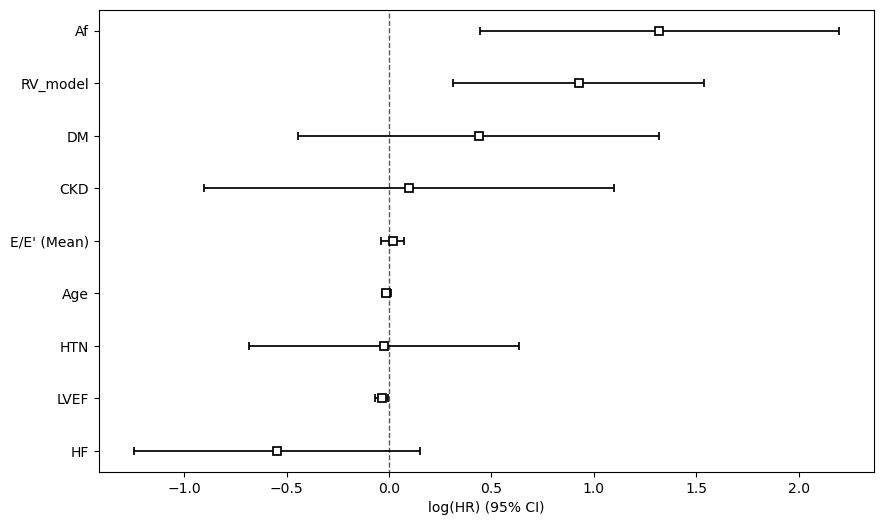

In [25]:
import matplotlib.pyplot as plt
plt.subplots(figsize = (10, 6))
cph.plot()

> <span style="font-size:1.2em;">**Additional Estimation**</span>\
> *If you're interested in how a single variable may affect the survival curve of these patients,*    \
> *Kaplein-Meier Curve might be able to give you a brief and clear estimation.*

Text(0.5, 1.0, 'Survival of different groups')

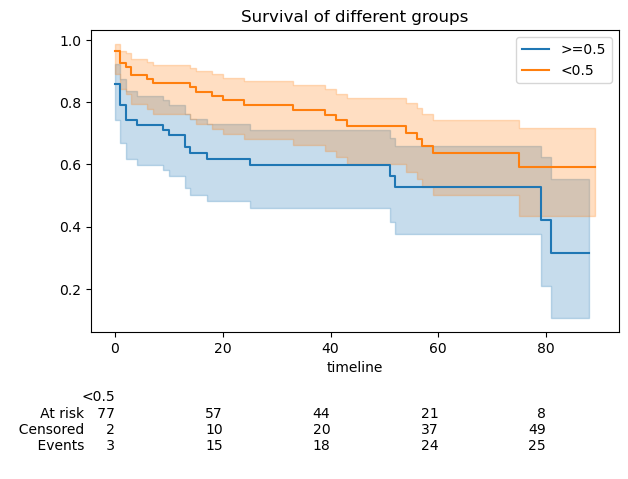

In [29]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
ax = plt.subplot(111)
m = (PAH_data["RV_model"] >= 0.5)
kmf.fit(durations = PAH_data['months'][m], event_observed = PAH_data['event'][m], label = ">=0.5")
kmf.plot_survival_function(ax = ax)
kmf.fit(PAH_data['months'][~m], event_observed = PAH_data['event'][~m], label = "<0.5")
kmf.plot_survival_function(ax = ax, at_risk_counts = True)
plt.title("Survival of different groups")